# Homework 1 Part 1 - Solutions

This is an individual assignment.

---

Write your answers as markdown cells.

---

# Problem 1 (4 points)

**The figure below illustrates the hyperparameter tuning performance in two datasets (training and validation) as a function of the model order, $M$, in the polynomial regression mapper function (or model).**

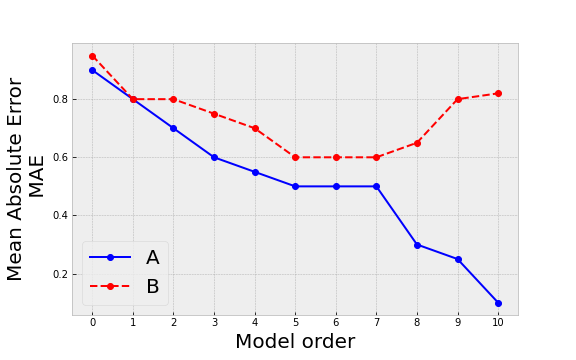

In [1]:
from IPython.display import Image
Image('figures/performance.png', width=400)

**Based on these graph, answer the following questions:**

1. (2 points) **Which line (A or B) correspond to the train and validation sets?**
2. (2 points) **Based on these results, which model order $M$ would you select for the final model?**

**Justify your answers.**

1. Line A corresponds to the training set performance because as the model order increases, the error measure decreases as the model starts to overfit to the training set. Line B corresponds to the validation set performance. From the plot we see that at first the error measure decreases as model order increases, but then it starts to increase as the model starts to overfit to the training set.

2. We want to select the model order that minimizes the error measure in both training and validation set. From the plot, we see that model order 5, 6 and 7 are good candidates. Applying the Occam's razor principle, we should the model order that will produce a simpler model (less computational expensive, requiring less memory). Therefore, based on this plot, we should choose model order 5.

---

# Problem 2 (4 points)

**In practice, what strategies can you apply to avoid overfitting? List at least 4 distinct strategies and explain why they are effective at mitigating overfitting.**

1. Add more data. More data prevents the model from memorizing the training data.
2. Regularization. Including a regularization penalty on the model's parameters. It has been observed that the model parameters become too large when the model is overfitting. So we can include a regularization penalty that enforces the parameters to be small.
3. Cross-validation. Perform cross-validation to make sure the model generalizes and learns from all sets of samples.
4. Reduce complexity. Consider a model with reduced complexity. A more complex models tend to require more data to train and often times, tend to overfit.

---

# Problem 3 (2 points)

**In practice, how can you determine whether you have overfitted your machine learning system?**

Cross-validation provides an indication as well as using a hold-out test set.
If the results are very good on training data and poor on validation data, that generally indicates overfitting.

---

# Problem 4 (4 points)

**Suppose you have 100 training samples that you are using to train a classifier to distinguish between four classes. The training data has 50 samples of class 1, 25 samples of class 2, 20 samples of class 3 and 5 samples of class 4. To evaluate the stability and performance of your classifier on each class, you use 10-fold cross-validation. Is it a good strategy to randomly partition the data into 10 folds? Why or why not? If yes, fully justify why. If no, state why not, provide an alternate cross-validation scheme and justify the new scheme.**

In this example 10-fold CV is not an appropriate CV strategy because the data samples are imbalanced. A random partition may place all samples from class 4 in one set, and the model would not be able to "see" these samples in validation. The model may end up having a good accuracy because all other samples are overwhelming represented in the data compared to class 4.

In this scenario, assuming we do not have access to more data, it will be wise to use stratified CV with no more than 5 folds, in order to ensure that each fold contains at least 1 sample per class, hence preserve the prior probabilities of each class. In general, each fold will have the same percentage of samples for each class.

---

# Problem 5 (2 points)

**Suppose that you split your data into training and test sets, and perform cross-validation with the training set to select the best set of parameters for the model. Can the model still overfit? Justify your answer.**

Yes, overfitting is still possible. Cross-validation is a technique that mitigates the problem of overfitting but it does not solve it. This is particularly true when the training set is small and/or does not include representatives for what the type of samples we may see in test.

---

# Problem 6 (4 points)

**Answer the following questions:**

1. (2 points) **Name one advantage and one disadvantage of using regularization.**

2. (2 points) **In practice, how criteria would you use to decide between ridge, lasso and elastic net regularization?**

1. One benefit of utilizing regularization is that it helps in preventing overfitting by regularizing theparameter solutions. A challenge in utilizing a regularization term is in determining the value for theparameter that controls the trade-off between optimizing the error term in the objective functionand the penalty term in the objective function. This value must be incorporate in the set ofcontrollable parameters to be determined using cross-validation.

2. Ridge is a good default, but if you suspect that only a few features are actually useful, you should prefer Lasso or Elastic Net since they tend to reduce the useless features' weights down to zero. In general, Elastic Net is preferred over Lasso since Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.

---

# Problem 7 (4 points)

**The figure below, shows how the weights associated with each with the 10 attributes/features change as a function of the regularizer parameter $\lambda$ in a linear regression model.**

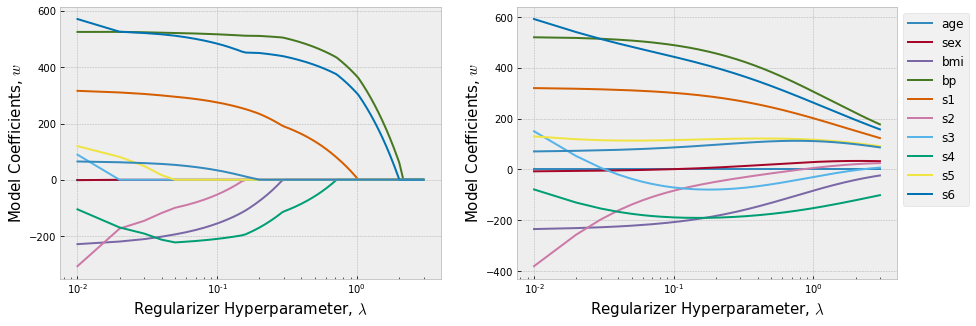

In [2]:
Image('figures/Regression_with_Regularizer.png', width=900)

**Based on this plots, which one (left or right) corresponds to the Ridge Regression and Lasso Regression? Justify your answer.**

We see that on the plot in the left, as the regularizer hyperparameter $\lambda$ increases, the coefficients $w_j$ converge to exactly 0. Thus the vector of coefficients, $\mathbf{w}$, will be sparse. This is a particular characteristic of the Lasso regularizer. Thus, ridge regularizer, corresponds to the plot on the right, where we see that the parameters $\mathbf{w}$ are decreasing in value but never reaching exactly 0.

---

# Problem 8 (4 points)

**In practice, when you are implementing your regression or classification tasks with your feature matrix $\mathbf{X}$ of size $N\times M$, $N$ is the number of training samples and $M$ is the number of dimensions/features.**

**If you encounter the computational error "matrix is singular":**

1. (2 points) **What does this mean about the feature matrix $\mathbf{X}$?**
2. (2 points) **What should you do to solve the problem?**

1. It means the matrix is not invertible because its determinant is equal to zero. A singular matrix has at least one eigenvalue equal to 0 which occurs when features are co-linear.
2. We should diagonally load the matrix before inverting it.

---

# Problem 9 (4 points)

**Before feeding the data to a mapper function, we must carry any necessary preprocessing. This may include encoding features, dealing with missing values, and scaling. In which order should the data be processed:**

* (2 points) **Option 1: Partition the data into training-test sets, then apply preprocessing based on training set.**

* (2 points) **Option 2: Apply preprocessing on entire data, then partition into training-test sets.**

Option 1 is correct. The data must be **split into training-test first**. 

If you preprocess the data first with the entire dataset, this will introduce bias in your results (good validation performances but poor results during deployment). This introduces bias because when you build the encoder transformer on the entire dataset, it will now contain information about the samples that will be use in the test set.

This is also referred to as **data leakage**.

---

# Problem 10 (9 points)

**Suppose that you are training a linear polynomial regression model of order $M$ for a training set with N data points $\{x_i\}^N_{i=1}$, where $x_i\in\mathbb{R}$, and its corresponding target labels $\{t_i\}^N_{i=1}$. Answer the following questions:**

1. (3 points) **Write down the mapper function. Use proper notation to avoid ambiguity.**

2. (3 points) **Suppose you want to minimize the absolute error with the Lasso regularizer. Write down the objective function.**

3. (3 points) **What is the Bayesian interpretation of this objective function? Show your work using parametric expressions and justify it further using words.**

1. The mapper function for a linear M-th order polynomial regression model can be written as:

\begin{align*}
    y(x_i) = \sum_{j=0}^M w_j x_i^j = \mathbf{X}\mathbf{w}
\end{align*}

where $\mathbf{w}=\begin{bmatrix}w_0\\w_1\\\vdots\\w_M\end{bmatrix}$ and $\mathbf{X}=\begin{bmatrix}1 & x_1 & \dots & x_1^M\\1 & x_2 & \dots & x_2^M\\\vdots & \vdots & \ddots & \vdots \\1 & x_N & \dots & x_N^M\end{bmatrix}$.

2. The absolute error objective function with the L1-regularization for the mapper function defined in problem (1) is:

\begin{align*}
    J(\mathbf{w}) = \frac{1}{2}\sum_{i=1}^N \left|t_i - y(x_i)\right| + \frac{\lambda}{2}\sum_{j=0}^M |w_j|
\end{align*}

3. The Bayesian interpretation of this objective function is equivalent to find the point estimate that maximizes the product of a data likelihood and a prior probability of the parameters $\mathbf{w}$.

\begin{align*}
    & \arg_{\mathbf{w}} \min J(\mathbf{w})\\
    =& \arg_{\mathbf{w}} \max -J(\mathbf{w})\\
    =& \arg_{\mathbf{w}} \max \exp \left(-J(\mathbf{w})\right)\\
    =& \arg_{\mathbf{w}} \max \exp \left(-\frac{1}{2}\sum_{i=1}^N \left|t_i - y(x_i)\right| - \frac{\lambda}{2}\sum_{j=0}^M |w_j|\right)\\
    =& \arg_{\mathbf{w}} \max \prod_{i=1}^N\frac{1}{2}\exp \left(-\left|t_i - y(x_i)\right|\right) \prod_{j=0}^M\frac{1}{2}\exp\left(-\lambda |w_j|\right)\\
    \propto & \arg_{\mathbf{w}} \max \prod_{i=1}^N \mathcal{L}\left(t_i| y(x_i), 1\right)\prod_{j=0}^M \mathcal{L}\left(w_j| 0, 1/\lambda\right)\\
    =& \arg_{\mathbf{w}} \max \mathcal{L}\left(\mathbf{t}| \mathbf{y}, \mathbf{1}\right)\mathcal{L}\left(\mathbf{w}| 0, 1/\lambda\right)
\end{align*}

As we see above, the data likelihood modeling the target variable $\mathbf{t}$ is described by a Laplace distribution with mean $\mathbf{y(x)}$ and scale 1. And, the prior probability modeling the parameters $\mathbf{w}$ also follow a Laplace distribution with mean 0 and scale $1/\lambda$.

---

# Problem 11 (4 points)

**Answer the following questions:**

1. (2 points) **What is the *Bayesian interpretation* of a constrained objective function, i.e. objective function with a regularizer?**
2. (1 point) **Why is it useful in machine learning?**
3. (1 point) **What advantages, if any, does it bring when performing parameter estimation?**
4. (1 point) **Suppose you used the Bayesian approach to estimate a data likelihood. Provide a practical example on how you can use that data likelihood estimation.**

The Bayesian interpretation of the objective function provides a different perspective of the optimization problem. Put simply, it illustrates how the least squares objective function with a regularizer penalty term is equivalent to the Maximum A Posteriori (MAP) point estimation, where the data likelihood and prior probability have a specific
probabilistic model.

This interpretation allows us to think about the objective function in the Bayesian sense, thus now we can pick any probabilistic model for the data likelihood and prior distributions, those that fit the data better (alleviating Gaussianity assumptions) and encoding prior beliefs that fit the problem better as well.

Additionally, with the Bayesian interpretation, we are able to make online updates of the prior distributions provided that we are working with a conjugate prior relationship. This online update would not be possible with the "objective function interpretation", because it would require us to hard-code the penalty term. But in the Bayesian interpretation, we are able to start with a non-informative or incorrect prior and update it as we collect more data.

Once we have a density estimation for the data likelihood, we can use that distribution to generate new data by randomly sample from said distribution. This will allow us to generate more samples and build simulations on those samples to test several case scenarios.

---

# On-Time (5 points)

Submit your assignment before the deadline.

___

# Submit Your Solution

Confirm that you've successfully completed the assignment.

Along with the Notebook, include a PDF of the notebook with your solutions.

```add``` and ```commit``` the final version of your work, and ```push``` your code to your GitHub repository.

Submit the URL of your GitHub Repository as your assignment submission on Canvas.

___